# Template

In [94]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from scipy.interpolate import interp1d

plt.style.use('science')
plt.rcParams.update({'font.size': 14})

In [ ]:
def plot_csv_folder(folder_path):
    """
    Plots all CSV files in a given folder.
    X-axis: time
    Y-axis: voltage (one or multiple columns)
    """
    colors = ['blue', 'crimson']
    
    for filename in sorted(os.listdir(folder_path)):
        if not filename.lower().endswith(".csv"):
            continue

        file_path = os.path.join(folder_path, filename)

        df = pd.read_csv(file_path, skiprows=3, header=None)

        time = df.iloc[:, 0]*1e6 # us
        voltages = df.iloc[:, 1:]
        print(filename)
        fig, ax = plt.subplots(1,1, figsize=(6,4))
        for i,col in enumerate(voltages.columns):
            ax.plot(time, voltages[col], label=f"Channel {col}", color=colors[i])

        ax.set_xlabel(r"Time $t$ / $\mu$s", fontsize=16)
        ax.set_ylabel(r"Voltage $U$ / V", fontsize=16)
        ax.legend(fontsize=16, frameon=True)
        ax.grid(True)
        plt.tight_layout()
        plt.show()

# Versuch 1


## Versuch 1a

In [ ]:
def plot_V01a_pulse_response(folder_path):
    colors = ['blue', 'crimson']
    pulse_width = [50, 100, 200, 400, 800, 1000] #ns 
    files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(".csv")])[:6]

    fig, axs = plt.subplots(
        3, 2,
        figsize=(10, 8),
        sharey=True,
        sharex='col'
    )

    legend_handles = None
    legend_labels = None

    for idx, filename in enumerate(files):
        row = idx % 3
        col = 0 if idx < 3 else 1

        ax = axs[row, col]
        file_path = os.path.join(folder_path, filename)

        df = pd.read_csv(file_path, skiprows=3, header=None)
        time = df.iloc[:, 0] * 1e6  # µs
        voltages = df.iloc[:, 1:]

        for i, vcol in enumerate(voltages.columns):
            line, = ax.plot(time, voltages[vcol],
                            color=colors[i],
                            label=f"Channel {vcol}")

            # store legend only once
            if legend_handles is None:
                legend_handles = [line]
                legend_labels = [r"Eingang $U_1$"]
            elif len(legend_handles) < len(voltages.columns):
                legend_handles.append(line)
                legend_labels.append(r"Ausgang $U_2$")

        ax.set_title(f"Pulse: {pulse_width[idx]} ns", fontsize=16)
        ax.grid(True)

        if col == 0:
            ax.set_xlim(-0.2, 0.4)
            ax.set_ylabel(r"Spannung $U$ / V", fontsize=16)
        else:
            ax.set_xlim(-0.2, 1.2)

        if row == 2:
            ax.set_xlabel(r"Zeit $t$ / $\mu$s", fontsize=16)

    # Single legend below all plots
    fig.legend(
        legend_handles,
        legend_labels,
        loc='lower center',
        ncol=len(legend_labels),
        fontsize=16
    )

    plt.tight_layout(rect=[0, 0.06, 1, 1])
    plt.show()

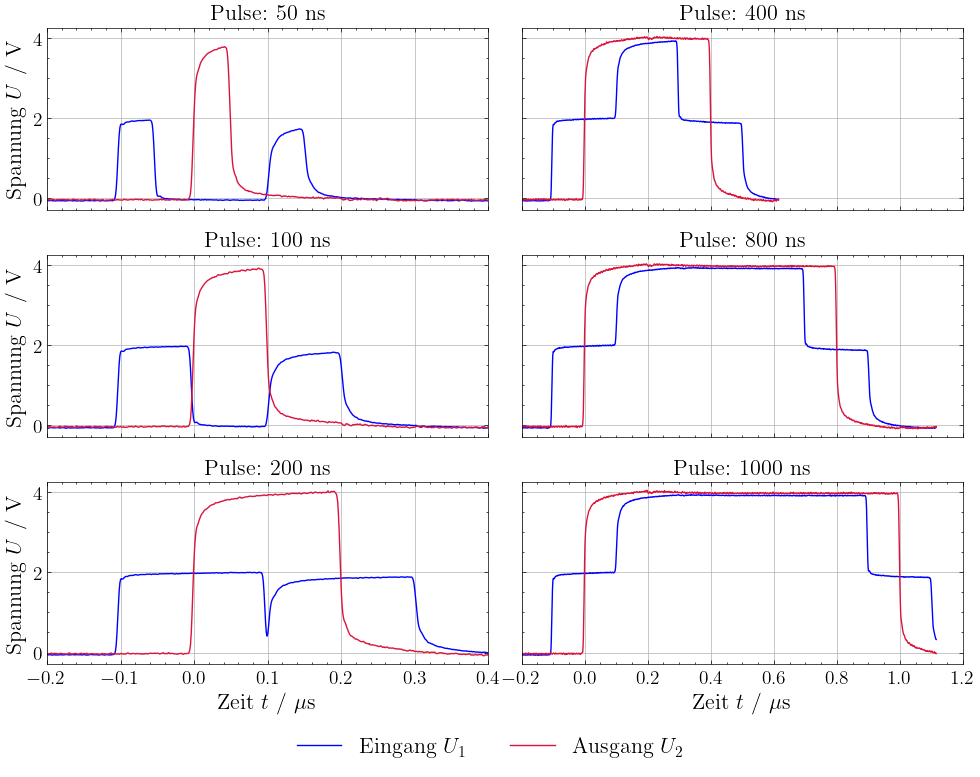

In [ ]:
folder_path = "data/Signalleitung/V01a"
plot_V01a_pulse_response(folder_path)

## Versuch 1b und 1c

In [79]:
def plot_V01bc_pulse_response(folder_path, plot_type):
    colors = ['blue', 'crimson']

    if plot_type == "Serie":
        p100ns, p1us = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(".csv")])[:2]
    elif plot_type == "Parallel":
        p100ns, p1us = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(".csv")])[2:]
    else:
        return -1
    
    fig, (axl, axr) = plt.subplots(
        1, 2, figsize=(10, 3.5), sharey=True, 
        sharex=True, constrained_layout=True)

    file_path_p100ns = os.path.join(folder_path, p100ns)
    df_p100ns = pd.read_csv(file_path_p100ns, skiprows=3, header=None)
    
    file_path_p1us = os.path.join(folder_path, p1us)
    df_p1us = pd.read_csv(file_path_p1us, skiprows=3, header=None)

    timel = df_p100ns.iloc[:, 0] * 1e6  # µs
    timer = df_p1us.iloc[:, 0] * 1e6  # µs
    voltages_p100ns = df_p100ns.iloc[:, 1:]
    voltages_p1us = df_p1us.iloc[:, 1:]

    legend_labels = [r"Eingang $U_1$", r"Ausgang $U_2$"]
    for i, vcol in enumerate(voltages_p100ns.columns):
        axl.plot(timel, voltages_p100ns[vcol], color=colors[i], label=legend_labels[i])

    for i, vcol in enumerate(voltages_p1us.columns):
        axr.plot(timer, voltages_p1us[vcol], color=colors[i],  label=legend_labels[i])
        
    axl.set_title(r"Pulse: $100$ ns", fontsize=16)
    axl.grid(True)
    axl.legend(frameon=True, fontsize=16)
    axl.set_xlim(-0.2, 2.1)
    axl.set_ylabel(r"Spannung $U$ / V", fontsize=16)
    axl.set_xlabel(r"Zeit $t$ / $\mu$s", fontsize=16)
    
    axr.set_title(r"Pulse: $1$ $\mu$s", fontsize=16)
    axr.grid(True)
    axr.legend(frameon=True, fontsize=16)
    axr.set_xlabel(r"Zeit $t$ / $\mu$s", fontsize=16)

    # fig.legend(loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=2, fontsize=16)
    #fig.subplots_adjust(left=0.08, right=0.98, top=0.88, bottom=0.22)

    plt.show()

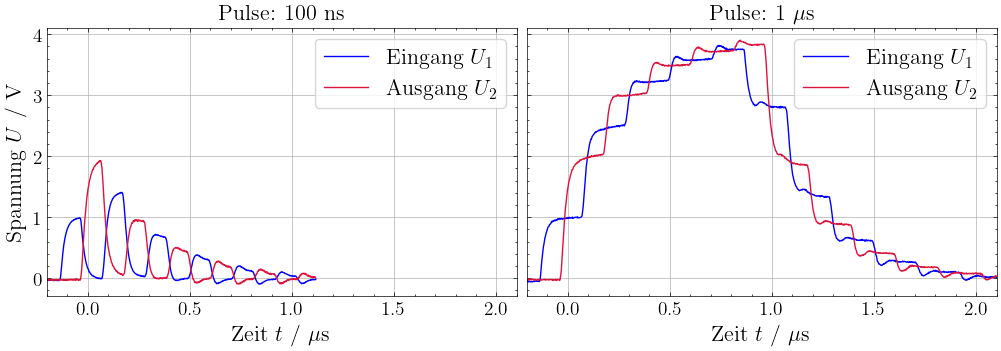

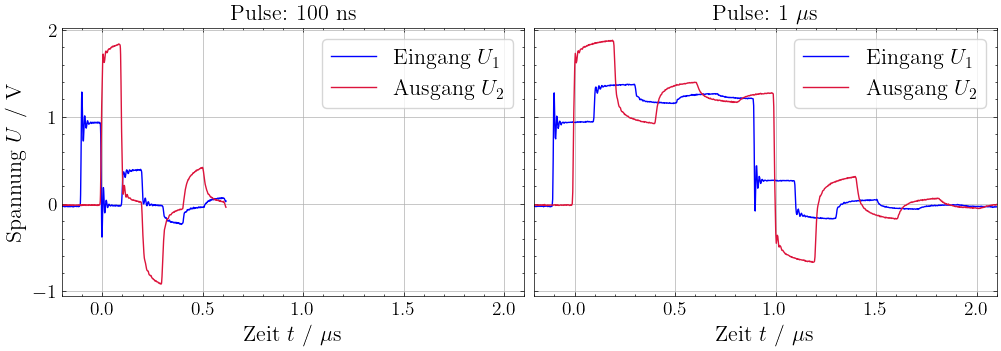

In [80]:
folder_path = "data/Signalleitung/V01b"
plot_V01bc_pulse_response(folder_path, "Serie")
plot_V01bc_pulse_response(folder_path, "Parallel")

# Versuch 2

In [93]:
folder_path = "data/Signalleitung/V02"
# plot_csv_folder(folder_path)

In [ ]:
R_measure = np.array([678.0, 68.1, 47.2, 16.2, 16.5, 16.1, 197.9, 330.3, 1795.0, 1195.0, 100.2, 12.6, 18.1, 33.2]) # Ohm
delta_R = np.where(R_measure > 600, R_measure*0.009 + 1, R_measure*0.009 + 0.2)

U_e = 2 #V
U_r = np.array([1.675, 0.288, -0.075, -1.0, -0.975, -1.0, 1.075, 1.4, 1.815, 1.737, 0.638, -1.165, -0.888, -0.4]) # V 
delta_U = 0.05

rho = U_r / U_e
delta_rho = np.abs(rho * (delta_U / U_e + np.abs(delta_U / U_r)))

# sort data
idx = np.argsort(R_measure)
R_sorted = R_measure[idx]
delta_R_sorted = delta_R[idx]
rho_sorted = rho[idx]
delta_rho_sorted = delta_rho[idx]

R_(rho=0) = (51.52 ± 4.45) Ohm


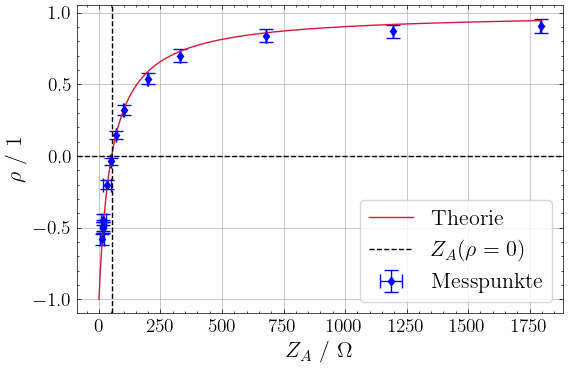

In [106]:
# calculate rho=0 usinf linear interpolation
for i in range(len(rho_sorted) - 1):
    if rho_sorted[i] * rho_sorted[i + 1] < 0:
        sign_change = i
        break

R1, R2 = R_sorted[sign_change], R_sorted[sign_change + 1]
rho1, rho2 = rho_sorted[sign_change], rho_sorted[sign_change + 1]
d_rho1, d_rho2 = delta_rho_sorted[sign_change], delta_rho_sorted[sign_change + 1]

R_rho0 = R1 - rho1 * (R2 - R1) / (rho2 - rho1)
delta_R_rho0 = np.abs((R2 - R1) / (rho2 - rho1)) * np.sqrt(d_rho1**2 + d_rho2**2)

print(f"R_(rho=0) = ({R_rho0:.2f} ± {delta_R_rho0:.2f}) Ohm")

R_fine = np.linspace(0, max(R_measure), 1000)
rho_theo = lambda Z_A, Z_K: (Z_A - Z_K) / (Z_A + Z_K)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.errorbar(
    R_measure, rho,
    xerr=delta_R_sorted, yerr=delta_rho,
    capsize=5, linestyle='none',
    marker='d', markersize=4.5,
    color='blue', label='Messpunkte'
)

ax.plot(R_fine, rho_theo(R_fine, R_rho0), color='crimson', label='Theorie')

ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.axvline(
    R_rho0, color='black', linestyle='--',
    label=rf"$Z_A(\rho=0)$"
)

ax.set_xlabel(r"$Z_A$ / $\Omega$", fontsize=16)
ax.set_ylabel(r"$\rho$ / 1", fontsize=16)
ax.grid(True)
ax.legend(fontsize=16, frameon=True)

plt.tight_layout()
plt.show()

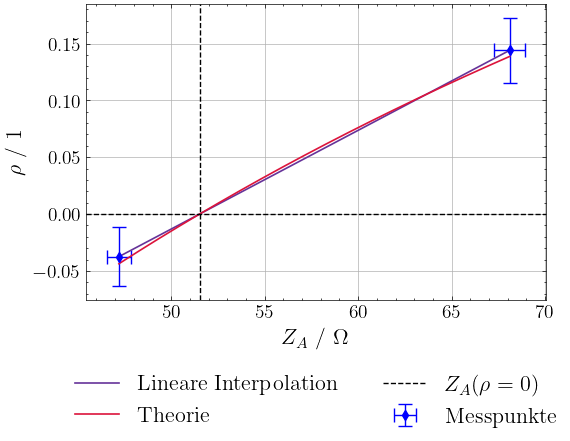

In [144]:
R_interp = np.linspace(R1, R2, 1000)
rho_interp_line = rho1 + (rho2 - rho1) * (R_interp - R1) / (R2 - R1)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.errorbar(
    [R1, R2], [rho1, rho2], yerr=[d_rho1, d_rho2], 
    xerr=[delta_R_sorted[sign_change], delta_R_sorted[sign_change + 1]],
    fmt='d', markersize=5, capsize=5, color='blue',label='Messpunkte'
)

ax.plot(
    R_interp, rho_interp_line, color='rebeccapurple',
    linestyle='-',linewidth=1.2, label='Lineare Interpolation'
)

ax.plot(
    R_interp, rho_theo(R_interp, R_rho0), color='crimson',
    linestyle='-', label='Theorie', linewidth=1.2
)

ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.axvline(
    R_rho0, color='black', linestyle='--',
    label=r"$Z_A(\rho=0)$"
)
ax.set_xlabel(r"$Z_A$ / $\Omega$", fontsize=16)
ax.set_ylabel(r"$\rho$ / 1", fontsize=16)
ax.grid(True)
ax.legend(
    fontsize=16, frameon=False, ncols=2, 
    loc='lower center', bbox_to_anchor=(0.5, -0.5)
)

plt.tight_layout(rect=[0, -0.2, 1, 1])
plt.show()